In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
df = pd.read_csv('properties_OutlierTreatment_missing_value_imputation.csv')

In [4]:
df.shape

(3547, 18)

In [5]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ss the leaf,sector 85,1.20,12371.0,2.0,2.0,2,4.0,Relatively New,1190.0,0.0,1.0,1.0,0.0,0.0,1,81
1,flat,tulip purple,sector 69,1.80,9000.0,4.0,5.0,3+,4.0,Relatively New,2200.0,0.0,1.0,0.0,0.0,0.0,1,165
2,flat,umang monsoon breeze,sector 78,1.15,5284.0,3.0,3.0,3,9.0,Moderately Old,1969.0,0.0,1.0,0.0,0.0,1.0,1,22
3,house,independent,sector 7,2.25,16892.0,5.0,3.0,0,2.0,Old Property,148.0,0.0,0.0,0.0,0.0,0.0,1,0
4,flat,tulip violet,sector 69,1.75,9459.0,3.0,4.0,2,0.0,Relatively New,2056.0,0.0,0.0,0.0,0.0,0.0,0,174


In [6]:
# Remove tye 'price_per_sqft' column coz it is directly related with the price column
# Remove  the  society column as the user can find the price by secting the society from any of the ptoperty websites.  
train_df = df.drop(columns=['society','price_per_sqft'])

In [7]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,sector 85,1.20,2.0,2.0,2,4.0,Relatively New,1190.0,0.0,1.0,1.0,0.0,0.0,1,81
1,flat,sector 69,1.80,4.0,5.0,3+,4.0,Relatively New,2200.0,0.0,1.0,0.0,0.0,0.0,1,165
2,flat,sector 78,1.15,3.0,3.0,3,9.0,Moderately Old,1969.0,0.0,1.0,0.0,0.0,1.0,1,22
3,house,sector 7,2.25,5.0,3.0,0,2.0,Old Property,148.0,0.0,0.0,0.0,0.0,0.0,1,0
4,flat,sector 69,1.75,3.0,4.0,2,0.0,Relatively New,2056.0,0.0,0.0,0.0,0.0,0.0,0,174


<Axes: >

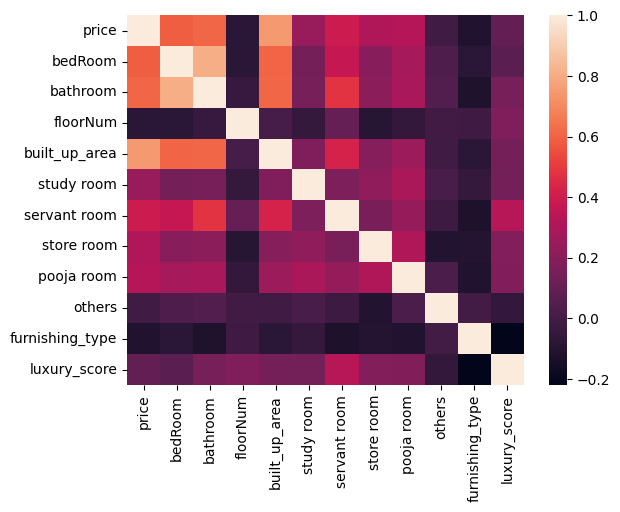

In [9]:
numeric_df = train_df.select_dtypes(include='number')
sns.heatmap(numeric_df.corr())


In [11]:
numeric_df = train_df.select_dtypes(include='number')
numeric_df.corr()['price'].sort_values(ascending=False)

price              1.000000
built_up_area      0.747260
bathroom           0.608328
bedRoom            0.589503
servant room       0.392213
pooja room         0.321734
store room         0.306242
study room         0.244528
luxury_score       0.091886
others            -0.012891
floorNum          -0.085669
furnishing_type   -0.111285
Name: price, dtype: float64

In [13]:
# cols need to be examined further

# numerical -> luxury_score, others, floorNum
# categorical -> property_type, sector, agePossession
# we will check which feature is most important for our analysis

# Convert the luxury_score column into categorical column

<Axes: >

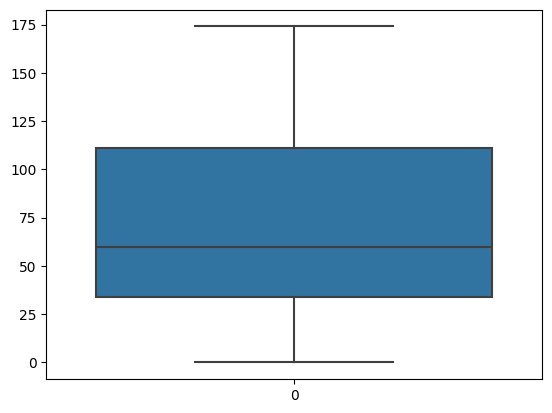

In [14]:
sns.boxplot(df['luxury_score'])

In [15]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [16]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [17]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,flat,sector 85,1.20,2.0,2.0,2,4.0,Relatively New,1190.0,0.0,1.0,1.0,0.0,0.0,1,81,Medium
1,flat,sector 69,1.80,4.0,5.0,3+,4.0,Relatively New,2200.0,0.0,1.0,0.0,0.0,0.0,1,165,High
2,flat,sector 78,1.15,3.0,3.0,3,9.0,Moderately Old,1969.0,0.0,1.0,0.0,0.0,1.0,1,22,Low
3,house,sector 7,2.25,5.0,3.0,0,2.0,Old Property,148.0,0.0,0.0,0.0,0.0,0.0,1,0,Low
4,flat,sector 69,1.75,3.0,4.0,2,0.0,Relatively New,2056.0,0.0,0.0,0.0,0.0,0.0,0,174,High


# Convert the floorNum column into categorical column

<Axes: >

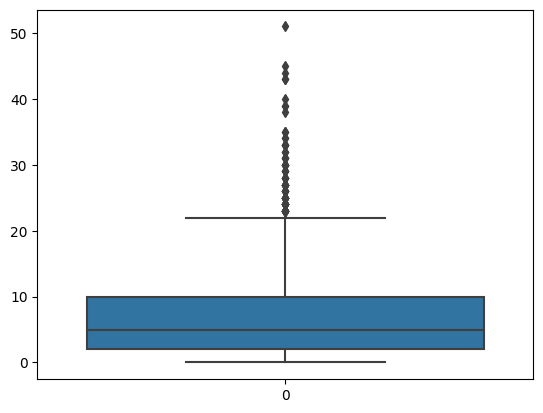

In [18]:
sns.boxplot(df['floorNum'])

In [19]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [20]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [21]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,flat,sector 85,1.20,2.0,2.0,2,4.0,Relatively New,1190.0,0.0,1.0,1.0,0.0,0.0,1,81,Medium,Mid Floor
1,flat,sector 69,1.80,4.0,5.0,3+,4.0,Relatively New,2200.0,0.0,1.0,0.0,0.0,0.0,1,165,High,Mid Floor
2,flat,sector 78,1.15,3.0,3.0,3,9.0,Moderately Old,1969.0,0.0,1.0,0.0,0.0,1.0,1,22,Low,Mid Floor
3,house,sector 7,2.25,5.0,3.0,0,2.0,Old Property,148.0,0.0,0.0,0.0,0.0,0.0,1,0,Low,Low Floor
4,flat,sector 69,1.75,3.0,4.0,2,0.0,Relatively New,2056.0,0.0,0.0,0.0,0.0,0.0,0,174,High,Low Floor


In [22]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [23]:
train_df.head()

,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,flat,sector 85,1.20,2.0,2.0,2,Relatively New,1190.0,0.0,1.0,1.0,0.0,0.0,1,Medium,Mid Floor
1,flat,sector 69,1.80,4.0,5.0,3+,Relatively New,2200.0,0.0,1.0,0.0,0.0,0.0,1,High,Mid Floor
2,flat,sector 78,1.15,3.0,3.0,3,Moderately Old,1969.0,0.0,1.0,0.0,0.0,1.0,1,Low,Mid Floor
3,house,sector 7,2.25,5.0,3.0,0,Old Property,148.0,0.0,0.0,0.0,0.0,0.0,1,Low,Low Floor
4,flat,sector 69,1.75,3.0,4.0,2,Relatively New,2056.0,0.0,0.0,0.0,0.0,0.0,0,High,Low Floor


In [25]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3547 entries, 0 to 3546
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3547 non-null   object 
 1   sector           3547 non-null   object 
 2   price            3547 non-null   float64
 3   bedRoom          3547 non-null   float64
 4   bathroom         3547 non-null   float64
 5   balcony          3547 non-null   object 
 6   agePossession    3547 non-null   object 
 7   built_up_area    3547 non-null   float64
 8   study room       3547 non-null   float64
 9   servant room     3547 non-null   float64
 10  store room       3547 non-null   float64
 11  pooja room       3547 non-null   float64
 12  others           3547 non-null   float64
 13  furnishing_type  3547 non-null   int64  
 14  luxury_category  3547 non-null   object 
 15  floor_category   3547 non-null   object 
dtypes: float64(9), int64(1), object(6)
memory usage: 443.5+ KB


In [24]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'new',
       'new sector 2', 'sector 1', 'sector 102', 'sector 103',
       'sector 104', 'sector 105', 'sector 106', 'sector 107',
       'sector 108', 'sector 109', 'sector 10a', 'sector 11',
       'sector 110', 'sector 111', 'sector 112', 'sector 113',
       'sector 12', 'sector 13', 'sector 14', 'sector 15', 'sector 17',
       'sector 17a', 'sector 17b', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 3 phase 2',
       'sector 3 phase 3 extension', 'sector 30', 'sector 31',
       'sector 33', 'sector 36', 'sector 36a', 'sector 37c', 'sector 37d',
       'sector 38', 'sector 39', 'sector 4', 'sector 40', 'sector 41',
       'sector 43', 'sector 45', 'sector 46', 'sector 47', 'sector 48',
       'sector 49', 'sector 5', 'sector 50', 'sector 51', 'sector 52',
       'sector 53', 'sect

In [27]:
X_label.head()

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0.0,98.0,2.0,2.0,2.0,3.0,1190.0,0.0,1.0,1.0,0.0,0.0,1,2.0,2.0
1,0.0,79.0,4.0,5.0,4.0,3.0,2200.0,0.0,1.0,0.0,0.0,0.0,1,0.0,2.0
2,0.0,89.0,3.0,3.0,3.0,0.0,1969.0,0.0,1.0,0.0,0.0,1.0,1,1.0,2.0
3,1.0,80.0,5.0,3.0,0.0,2.0,148.0,0.0,0.0,0.0,0.0,0.0,1,1.0,1.0
4,0.0,79.0,3.0,4.0,2.0,3.0,2056.0,0.0,0.0,0.0,0.0,0.0,0,0.0,1.0


In [29]:
y_label.head()

0    1.20
1    1.80
2    1.15
3    2.25
4    1.75
Name: price, dtype: float64

#We will use different feature importance technique and then find the average of all the fiture inportance scores provided by different methods.

### Technique 1 - Using correlation coefficients

<Axes: >

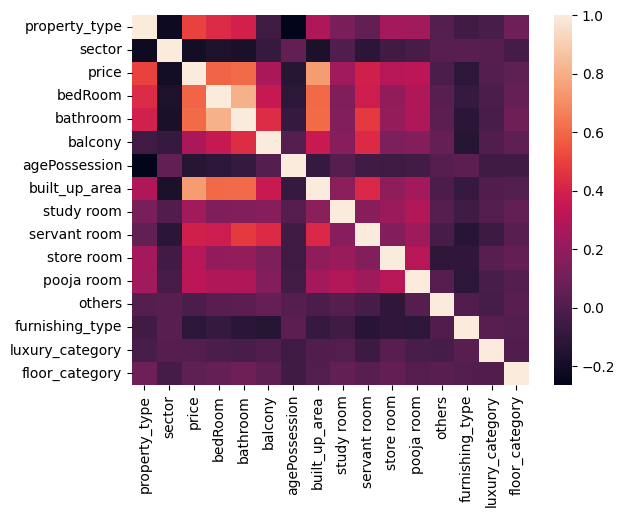

In [30]:
sns.heatmap(data_label_encoded.corr())

In [36]:
#fi_df1 = data_label_encoded.corr()['price'].iloc[0:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1 = data_label_encoded.corr()['price'].iloc[0:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,property_type,0.501967
1,sector,-0.200370
2,price,1.000000
3,bedRoom,0.589503
4,bathroom,0.608328
5,balcony,0.269800
6,agePossession,-0.133579
7,built_up_area,0.747260
8,study room,0.244528
9,servant room,0.392213


### Technique 2 - Random Forest Feature Importance

In [34]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
6,built_up_area,0.647233
1,sector,0.105058
0,property_type,0.103924
3,bathroom,0.024782
2,bedRoom,0.024616
8,servant room,0.021959
5,agePossession,0.013640
4,balcony,0.013606
12,furnishing_type,0.008499
7,study room,0.008142


### Technique 3 - GradientBoostingRegressor Feature Importance

In [35]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a GradientBoostingRegressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
6,built_up_area,0.680850
1,sector,0.106565
0,property_type,0.099025
2,bedRoom,0.034735
3,bathroom,0.033992
8,servant room,0.023158
9,store room,0.009145
5,agePossession,0.004490
7,study room,0.003752
4,balcony,0.001747


### Technique 4 - Permutation_Importance Feature Importance

In [39]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
6,built_up_area,0.737314
0,property_type,0.191158
1,sector,0.143892
8,servant room,0.013272
3,bathroom,0.012874
4,balcony,0.011699
2,bedRoom,0.011158
14,floor_category,0.003621
7,study room,0.002776
5,agePossession,0.002662


### Technique 5 - LASSO regression Feature Importance
It may not give reliable scores coz we have used ordinal encoding on the categorical features, 
and this is a linear model which can be biased due to ordinal encodings. 

In [41]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5


,feature,lasso_coeff
6,built_up_area,1.501274
0,property_type,0.706713
3,bathroom,0.290846
9,store room,0.210301
8,servant room,0.180170
7,study room,0.179173
10,pooja room,0.084090
13,luxury_category,0.045715
2,bedRoom,0.026223
5,agePossession,-0.000000


### Technique 6 - RFE

In [42]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6


,feature,rfe_score
6,built_up_area,0.647032
0,property_type,0.104293
1,sector,0.104061
2,bedRoom,0.028269
3,bathroom,0.023134
8,servant room,0.021052
5,agePossession,0.014372
4,balcony,0.013295
12,furnishing_type,0.009046
7,study room,0.007975


### Technique 7 - Linear Regression Weights

In [45]:
from sklearn.linear_model import LinearRegression


In [46]:
# Train a linear regression model on the label-encoded and standardized training data
# again not reliable due to ordinal encodings.
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

# Extract coefficients
fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False)

fi_df7


,feature,reg_coeffs
6,built_up_area,1.503761
0,property_type,0.705355
3,bathroom,0.298087
9,store room,0.214892
8,servant room,0.189904
7,study room,0.187783
10,pooja room,0.087318
13,luxury_category,0.056429
2,bedRoom,0.029593
5,agePossession,-0.002129


### Technique 8 - SHAP
Advanced technique used in explainable AI models 

In [47]:
! pip install shap

  Using cached shap-0.45.0-cp310-cp310-macosx_11_0_arm64.whl.metadata (24 kB)
  Using cached slicer-0.0.7-py3-none-any.whl.metadata (3.7 kB)
  Using cached cloudpickle-3.0.0-py3-none-any.whl.metadata (7.0 kB)
Using cached shap-0.45.0-cp310-cp310-macosx_11_0_arm64.whl (452 kB)
Using cached slicer-0.0.7-py3-none-any.whl (14 kB)
Using cached cloudpickle-3.0.0-py3-none-any.whl (20 kB)


In [48]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values


array([[-2.06544210e-01, -3.30389600e-01, -4.23404640e-02, ...,
        -7.89141235e-03,  5.90672611e-03, -6.99638185e-03],
       [-5.32605850e-01, -1.07511070e-01,  1.25545679e-02, ...,
        -3.43178780e-02,  2.72751601e-02, -4.19161932e-02],
       [-3.77805173e-01, -3.99522299e-01, -2.19189972e-02, ...,
        -2.63589815e-02, -1.30887554e-02, -2.43970603e-02],
       ...,
       [ 1.21777161e+00,  3.71080529e-01,  1.66220243e-02, ...,
         9.83799045e-03,  4.67413010e-03, -5.73703214e-03],
       [-3.03826333e-01,  3.23786832e-03,  2.69767222e-02, ...,
        -2.54583251e-02, -1.94322399e-02, -2.57362044e-02],
       [-1.61380940e-01,  1.31783839e-01, -3.99985587e-02, ...,
        -1.03650877e-02,  1.91830325e-04, -4.51853438e-03]])

In [49]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
6,built_up_area,1.238193
0,property_type,0.474361
1,sector,0.383653
3,bathroom,0.113056
8,servant room,0.102039
2,bedRoom,0.052903
4,balcony,0.043856
5,agePossession,0.026512
12,furnishing_type,0.026318
14,floor_category,0.024487


In [50]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [51]:
final_fi_df


,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
sector,-0.200370,0.105058,0.106565,0.143892,-0.046759,0.104061,-0.055366,0.383653
bedRoom,0.589503,0.024616,0.034735,0.011158,0.026223,0.028269,0.029593,0.052903
bathroom,0.608328,0.024782,0.033992,0.012874,0.290846,0.023134,0.298087,0.113056
balcony,0.269800,0.013606,0.001747,0.011699,-0.038933,0.013295,-0.061894,0.043856
agePossession,-0.133579,0.013640,0.004490,0.002662,-0.000000,0.014372,-0.002129,0.026512
built_up_area,0.747260,0.647233,0.680850,0.737314,1.501274,0.647032,1.503761,1.238193
study room,0.244528,0.008142,0.003752,0.002776,0.179173,0.007975,0.187783,0.018974
servant room,0.392213,0.021959,0.023158,0.013272,0.180170,0.021052,0.189904,0.102039
store room,0.306242,0.006558,0.009145,0.000886,0.210301,0.006828,0.214892,0.015624


In [52]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [53]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.716908
sector             0.138029
bathroom           0.031873
servant room       0.027398
bedRoom            0.026993
balcony            0.013115
agePossession      0.010370
furnishing_type    0.007056
study room         0.006850
store room         0.006711
floor_category     0.005922
luxury_category    0.004805
pooja room         0.002272
others             0.001697
dtype: float64

In [55]:
# to drop pooja room, study room, others
#X_label

In [56]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [57]:
scores.mean()

0.7967767865277483

In [58]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [59]:
scores.mean()

0.7970733955439008

#After dropping the columns 'pooja room', 'study room', 'others' is realtively unchanged, therefore we can drop these columns safely

In [60]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [61]:
export_df.to_csv('properties_with_feature_selection.csv', index=False)

In [63]:
export_df.head()

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0.0,98.0,2.0,2.0,2.0,3.0,1190.0,1.0,1.0,1,2.0,2.0,1.20
1,0.0,79.0,4.0,5.0,4.0,3.0,2200.0,1.0,0.0,1,0.0,2.0,1.80
2,0.0,89.0,3.0,3.0,3.0,0.0,1969.0,1.0,0.0,1,1.0,2.0,1.15
3,1.0,80.0,5.0,3.0,0.0,2.0,148.0,0.0,0.0,1,1.0,1.0,2.25
4,0.0,79.0,3.0,4.0,2.0,3.0,2056.0,0.0,0.0,0,0.0,1.0,1.75
